In [1]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [24]:
import os
import pandas as pd

data=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/tm/jena_climate_2009_2016.csv")

In [25]:
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [17]:
num_train_samples=int(0.5*len(data))
num_valid_samples=int(0.25*len(data))
num_test_samples=int(0.25*len(data))


In [26]:
mean=data.loc[:, data.columns != 'Date Time'][:num_train_samples].mean(axis=0)

In [27]:
mean

p (mbar)            988.748898
T (degC)              8.825443
Tpot (K)            282.904641
Tdew (degC)           4.312734
rh (%)               75.871407
VPmax (mbar)         13.144940
VPact (mbar)          9.193617
VPdef (mbar)          3.951248
sh (g/kg)             5.810175
H2OC (mmol/mol)       9.301560
rho (g/m**3)       1218.453496
wv (m/s)              2.149935
max. wv (m/s)         3.560588
wd (deg)            176.441517
dtype: float64

In [28]:
data.loc[:, data.columns != 'Date Time'] -= mean
std = data.loc[:, data.columns != 'Date Time'][:num_train_samples].std(axis=0)
data.loc[:, data.columns != 'Date Time'] /= std

In [29]:
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,0.913800,-1.920800,-1.974664,-1.866366,1.048204,-1.291343,-1.467150,-0.782383,-1.470122,-1.472031,2.124363,-0.730260,-0.779439,-0.281233
1,01.01.2009 00:20:00,0.919680,-1.965270,-2.018659,-1.920043,1.054219,-1.304500,-1.488855,-0.784480,-1.489115,-1.493463,2.173132,-0.932398,-0.887061,-0.469953
2,01.01.2009 00:30:00,0.914976,-1.976672,-2.029940,-1.924281,1.084290,-1.307131,-1.491266,-0.786577,-1.492913,-1.495845,2.183600,-1.277987,-1.261587,-0.056401
3,01.01.2009 00:40:00,0.912624,-1.953867,-2.006250,-1.890379,1.102333,-1.300553,-1.476797,-0.788674,-1.477719,-1.481557,2.158620,-1.180179,-1.317550,0.251143
4,01.01.2009 00:50:00,0.912624,-1.949306,-2.002866,-1.886142,1.096319,-1.299237,-1.474385,-0.788674,-1.477719,-1.479175,2.154100,-1.193220,-1.261587,0.441027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1.331243,-1.468121,-1.557274,-1.757600,-0.166680,-1.134775,-1.421329,-0.572699,-1.424539,-1.429168,1.772985,-0.965001,-0.878451,0.740416
420547,31.12.2016 23:30:00,1.314781,-1.388304,-1.477181,-1.747712,-0.370564,-1.101883,-1.416506,-0.526569,-1.420740,-1.424405,1.688768,-0.658534,-0.706256,0.674014
420548,31.12.2016 23:40:00,1.301846,-1.366639,-1.454619,-1.768900,-0.478821,-1.092673,-1.426152,-0.503503,-1.428337,-1.433930,1.663789,-0.697658,-0.671816,0.451512
420549,31.12.2016 23:50:00,1.300670,-1.488646,-1.575324,-1.814102,-0.244866,-1.142670,-1.445445,-0.564312,-1.451129,-1.452981,1.786783,-0.430315,-0.602938,0.574995


In [40]:
# understanding timeseries_dataset_from_array()

import numpy as np
from tensorflow import keras
int_sequence=np.arange(10)
dummy_dataset=keras.utils.timeseries_dataset_from_array(data=int_sequence[:-3],targets=int_sequence[3:],sequence_length=3,batch_size=2)

for inputs,targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [41]:
data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,0.913800,-1.920800,-1.974664,-1.866366,1.048204,-1.291343,-1.467150,-0.782383,-1.470122,-1.472031,2.124363,-0.730260,-0.779439,-0.281233
1,01.01.2009 00:20:00,0.919680,-1.965270,-2.018659,-1.920043,1.054219,-1.304500,-1.488855,-0.784480,-1.489115,-1.493463,2.173132,-0.932398,-0.887061,-0.469953
2,01.01.2009 00:30:00,0.914976,-1.976672,-2.029940,-1.924281,1.084290,-1.307131,-1.491266,-0.786577,-1.492913,-1.495845,2.183600,-1.277987,-1.261587,-0.056401
3,01.01.2009 00:40:00,0.912624,-1.953867,-2.006250,-1.890379,1.102333,-1.300553,-1.476797,-0.788674,-1.477719,-1.481557,2.158620,-1.180179,-1.317550,0.251143
4,01.01.2009 00:50:00,0.912624,-1.949306,-2.002866,-1.886142,1.096319,-1.299237,-1.474385,-0.788674,-1.477719,-1.479175,2.154100,-1.193220,-1.261587,0.441027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1.331243,-1.468121,-1.557274,-1.757600,-0.166680,-1.134775,-1.421329,-0.572699,-1.424539,-1.429168,1.772985,-0.965001,-0.878451,0.740416
420547,31.12.2016 23:30:00,1.314781,-1.388304,-1.477181,-1.747712,-0.370564,-1.101883,-1.416506,-0.526569,-1.420740,-1.424405,1.688768,-0.658534,-0.706256,0.674014
420548,31.12.2016 23:40:00,1.301846,-1.366639,-1.454619,-1.768900,-0.478821,-1.092673,-1.426152,-0.503503,-1.428337,-1.433930,1.663789,-0.697658,-0.671816,0.451512
420549,31.12.2016 23:50:00,1.300670,-1.488646,-1.575324,-1.814102,-0.244866,-1.142670,-1.445445,-0.564312,-1.451129,-1.452981,1.786783,-0.430315,-0.602938,0.574995


In [43]:
import os
fname=os.path.join('C:/Users/kusha/OneDrive/Desktop/Task/Deep_Learning_Everyday/tm/jena_climate_2009_2016.csv')

In [53]:
with open(fname) as f:
    data=f.read()


lines=data.split('\n')
header=lines[0].split(",")
lines=lines[1:]

In [ ]:
print(header) 
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [60]:
temp=np.zeros(len(lines))

In [61]:
temp

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
raw_data=np.zeros((len(lines),len(header)-1))

In [63]:
raw_data.shape

(420551, 14)

In [64]:
for i,line in enumerate(lines):
    values=[float(x) for x in line.split(",")[1:]]
    raw_data[i]=values[:]
    temp[i]=values[1]

In [67]:
raw_data[0],temp[0]

(array([ 9.96520e+02, -8.02000e+00,  2.65400e+02, -8.90000e+00,
         9.33000e+01,  3.33000e+00,  3.11000e+00,  2.20000e-01,
         1.94000e+00,  3.12000e+00,  1.30775e+03,  1.03000e+00,
         1.75000e+00,  1.52300e+02]),
 -8.02)

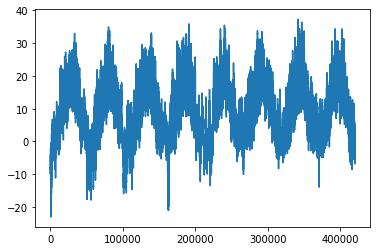

In [68]:
plt.plot(temp)

In [73]:
mean=raw_data[:num_train_samples].mean(axis=0)
raw_data-=mean
std=raw_data[:num_train_samples].std(axis=0)
raw_data/=std

In [74]:
raw_data

array([[ 0.91380254, -1.92080466, -1.97466884, ..., -0.73026213,
        -0.77944059, -0.28123391],
       [ 0.91968203, -1.96527448, -2.01866408, ..., -0.93239995,
        -0.88706316, -0.469954  ],
       [ 0.91497844, -1.976677  , -2.02994491, ..., -1.27799041,
        -1.26158972, -0.05640072],
       ...,
       [ 1.30184899, -1.36664229, -1.45462257, ..., -0.69765926,
        -0.67181802,  0.45151262],
       [ 1.3006731 , -1.48864923, -1.57532745, ..., -0.4303157 ,
        -0.60293957,  0.57499614],
       [ 1.30184899, -1.55592409, -1.64075626, ..., -0.59985064,
        -0.68903763,  0.09853615]])

In [117]:
sampling_rate=6
sequence_length=120
delay=sampling_rate*(sequence_length+24)

train_dataset=keras.utils.timeseries_dataset_from_array(raw_data[:-delay],temp[delay:],sampling_rate=sampling_rate,sequence_length=sequence_length,start_index=0,end_index=num_train_samples,batch_size=256)

valid_dataset=keras.utils.timeseries_dataset_from_array(raw_data[:-delay],temp[delay:],sampling_rate=sampling_rate,sequence_length=sequence_length,start_index=num_train_samples,end_index=num_train_samples+num_valid_samples,batch_size=256)

test_dataset=keras.utils.timeseries_dataset_from_array(raw_data[:-delay],temp[delay:],sampling_rate=sampling_rate,sequence_length=sequence_length,start_index=num_valid_samples+num_train_samples,batch_size=256)

In [ ]:
sample_counts=0
for samples, targets in train_dataset:
    print(samples.shape)
    print(targets.shape)
    break


 

(256, 120, 14)
(256,)


In [87]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 14), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
def eval_method(dataset):
    tot_err=0
    samples_seen=0
    for samples,targets in dataset:
        preds=samples[:,-1,1]*std[1]+mean[1]
        tot_err+=np.sum(np.abs(targets-preds))
        samples_seen+=samples.shape[0]
    return tot_err/(samples)

print(eval_method(valid_dataset).shape)

tf.Tensor(
[[[ 1.71450838e+06  1.79053078e+06  1.97517779e+06 ...  1.86510280e+05
    1.69534997e+05  5.48831507e+05]
  [ 1.96771490e+06  1.79053078e+06  1.95879116e+06 ...  1.33049178e+05
    1.40314184e+05  5.79431501e+05]
  [ 1.42356702e+06  1.98870677e+06  2.25859878e+06 ...  2.05254422e+05
    1.46980873e+05  4.29292888e+05]
  ...
  [-3.57323881e+05 -1.58197043e+05 -1.64824132e+05 ...  5.68102801e+04
    7.99418668e+04 -1.61714828e+05]
  [-4.56762691e+05 -1.52915331e+05 -1.57986165e+05 ...  9.45517290e+04
    1.21566705e+05 -1.56522560e+05]
  [-6.19049651e+05 -1.45395893e+05 -1.49012307e+05 ...  9.17895839e+04
    9.71366030e+04 -1.55416029e+05]]

 [[ 1.56091053e+06  1.79053078e+06  1.99184091e+06 ...  3.00330986e+05
    2.23405927e+05  4.64153311e+05]
  [ 2.00250779e+06  1.80436200e+06  1.95879116e+06 ...  1.11907492e+05
    9.36093929e+04  6.48453538e+05]
  [ 1.33151351e+06  1.98870677e+06  2.28041342e+06 ...  1.57064561e+06
    9.67612620e+05  4.81757666e+05]
  ...
  [-3.744549

In [126]:
from tensorflow import keras
from tensorflow.keras import layers

inputs=keras.Input(shape=(sequence_length,raw_data.shape[-1]))
x=layers.Flatten()(inputs)
x=layers.Dense(16,activation='relu')(x)
outputs=layers.Dense(1)(x)
model=keras.Model(inputs,outputs)

callbacks=[keras.callbacks.ModelCheckpoint("jena_dense.keras",save_best_only=True)]
model.compile(optimizer="rmsprop",loss='mse',metrics=['mae'])
history=model.fit(train_dataset,epochs=10,validation_data=valid_dataset,callbacks=callbacks)
model=keras.models.load_model('jena_dense.keras')

Epoch 1/10
819/819 [==============================] - 9s 11ms/step - loss: 19.0189 - mae: 3.3698 - val_loss: 88.5001 - val_mae: 7.7831
Epoch 2/10
819/819 [==============================] - 9s 11ms/step - loss: 15.4849 - mae: 3.0253 - val_loss: 111.8962 - val_mae: 8.5254
Epoch 3/10
819/819 [==============================] - 11s 13ms/step - loss: 14.5486 - mae: 2.9267 - val_loss: 99.4245 - val_mae: 7.9406
Epoch 4/10
819/819 [==============================] - 12s 15ms/step - loss: 13.6895 - mae: 2.8620 - val_loss: 94.2977 - val_mae: 7.6700
Epoch 5/10
819/819 [==============================] - 11s 13ms/step - loss: 13.0427 - mae: 2.8000 - val_loss: 96.3787 - val_mae: 7.6996
Epoch 6/10
819/819 [==============================] - 10s 12ms/step - loss: 12.8196 - mae: 2.7724 - val_loss: 98.2763 - val_mae: 7.7167
Epoch 7/10
819/819 [==============================] - 10s 13ms/step - loss: 12.5112 - mae: 2.7439 - val_loss: 87.5353 - val_mae: 7.2905
Epoch 8/10
819/819 [=============================

In [131]:
model.evaluate(test_dataset)[1]

405/405 [==============================] - 3s 7ms/step - loss: 10874.9854 - mae: 15.1758


15.175843238830566

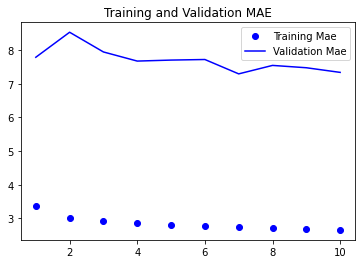

In [132]:
import matplotlib.pyplot as plt
loss=history.history['mae']
val_loss=history.history['val_mae']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Mae')
plt.plot(epochs,val_loss,'b',label='Validation Mae')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

In [137]:
input=keras.Input(shape=(sequence_length,raw_data.shape[-1]))
x=layers.LSTM(16)(input)
outpus=layers.Dense(1)(x)
model=keras.Model(inputs,outputs)

callbacks=[keras.callbacks.ModelCheckpoint("jena_lstm.keras",save_best_only=True)]
model.compile(optimizer='rmsprop',loss=['mse'],metrics=['mae'])
history=model.fit(train_dataset,epochs=10,validation_data=valid_dataset,callbacks=callbacks)

model=keras.models.load_model('jena_lstm.keras')

Epoch 1/10
819/819 [==============================] - 9s 11ms/step - loss: 11.4454 - mae: 2.6350 - val_loss: 90.5068 - val_mae: 7.2578
Epoch 2/10
819/819 [==============================] - 9s 11ms/step - loss: 11.2808 - mae: 2.6129 - val_loss: 86.9393 - val_mae: 7.0935
Epoch 3/10
819/819 [==============================] - 10s 12ms/step - loss: 11.1175 - mae: 2.5922 - val_loss: 83.0258 - val_mae: 6.9337
Epoch 4/10
819/819 [==============================] - 10s 12ms/step - loss: 11.0033 - mae: 2.5767 - val_loss: 81.6087 - val_mae: 6.8789
Epoch 5/10
819/819 [==============================] - 10s 12ms/step - loss: 10.8970 - mae: 2.5633 - val_loss: 80.4799 - val_mae: 6.8459
Epoch 6/10
819/819 [==============================] - 10s 12ms/step - loss: 10.8157 - mae: 2.5539 - val_loss: 77.9445 - val_mae: 6.7429
Epoch 7/10
819/819 [==============================] - 10s 12ms/step - loss: 10.7515 - mae: 2.5464 - val_loss: 75.4826 - val_mae: 6.6374
Epoch 8/10
819/819 [==============================

In [138]:
model.evaluate(test_dataset)[1]

405/405 [==============================] - 3s 7ms/step - loss: 11359.0771 - mae: 14.4042


14.404191970825195

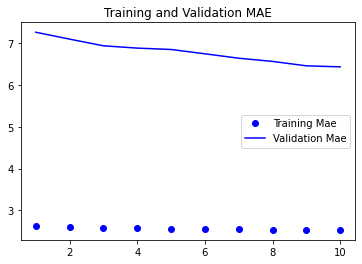

In [139]:
import matplotlib.pyplot as plt
loss=history.history['mae']
val_loss=history.history['val_mae']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Mae')
plt.plot(epochs,val_loss,'b',label='Validation Mae')
plt.title("Training and Validation MAE")
plt.legend()
plt.show()

In [150]:
# RNN Demo

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import yfinance as yfin
import random
random.seed(2505)


In [151]:
tick='GC=F'
gold=yfin.download(tick,'2015-12-20',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [152]:
gold

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,,
2015-12-21 00:00:00+00:00,1081.900024,1081.900024,1081.900024,1070.199951,1070.199951,26
2015-12-22 00:00:00+00:00,1074.800049,1074.800049,1078.599976,1073.800049,1078.599976,106
2015-12-23 00:00:00+00:00,1069.400024,1069.400024,1074.800049,1069.400024,1074.500000,202
2015-12-24 00:00:00+00:00,1077.199951,1077.199951,1077.800049,1073.500000,1074.300049,24
2015-12-28 00:00:00+00:00,1070.500000,1070.500000,1098.800049,1070.500000,1077.900024,361
...,...,...,...,...,...,...
2024-11-12 00:00:00+00:00,2600.000000,2600.000000,2605.500000,2592.800049,2605.500000,118
2024-11-13 00:00:00+00:00,2580.800049,2580.800049,2611.800049,2580.800049,2611.100098,53


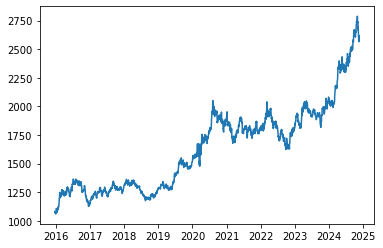

In [153]:
plt.plot(gold['Adj Close'])

In [238]:
returns=gold['Adj Close'].pct_change()

In [208]:
column_names=gold.columns

In [209]:
column_names

MultiIndex([('Adj Close', 'GC=F'),
            (    'Close', 'GC=F'),
            (     'High', 'GC=F'),
            (      'Low', 'GC=F'),
            (     'Open', 'GC=F'),
            (   'Volume', 'GC=F')],
           names=['Price', 'Ticker'])

In [210]:
x=gold.values
minmax=MinMaxScaler()

x_scaled=minmax.fit_transform(x)
df=pd.DataFrame(x_scaled)

In [211]:
pct_c_gold=df
pct_c_gold.columns=column_names
pct_c_gold

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F,GC=F
0,0.012613,0.012613,0.011523,0.006818,0.004810,0.000067
1,0.008505,0.008505,0.009612,0.008916,0.009678,0.000274
2,0.005381,0.005381,0.007412,0.006352,0.007302,0.000523
3,0.009894,0.009894,0.009149,0.008741,0.007186,0.000062
4,0.006017,0.006017,0.021309,0.006993,0.009273,0.000934
...,...,...,...,...,...,...
2235,0.890940,0.890940,0.893746,0.894062,0.894581,0.000305
2236,0.879831,0.879831,0.897394,0.887069,0.897827,0.000137
2237,0.872541,0.872541,0.876781,0.871569,0.865372,0.000070


In [212]:
pct_c_gold.columns=pct_c_gold.columns.droplevel([1])

In [213]:
pct_c_gold

Price,Adj Close,Close,High,Low,Open,Volume
0,0.012613,0.012613,0.011523,0.006818,0.004810,0.000067
1,0.008505,0.008505,0.009612,0.008916,0.009678,0.000274
2,0.005381,0.005381,0.007412,0.006352,0.007302,0.000523
3,0.009894,0.009894,0.009149,0.008741,0.007186,0.000062
4,0.006017,0.006017,0.021309,0.006993,0.009273,0.000934
...,...,...,...,...,...,...
2235,0.890940,0.890940,0.893746,0.894062,0.894581,0.000305
2236,0.879831,0.879831,0.897394,0.887069,0.897827,0.000137
2237,0.872541,0.872541,0.876781,0.871569,0.865372,0.000070
2238,0.871095,0.871095,0.870701,0.878270,0.871516,0.000070


In [242]:
returns.reset_index()

Ticker,Date,GC=F
0,2015-12-21 00:00:00+00:00,NaN
1,2015-12-22 00:00:00+00:00,-0.006563
2,2015-12-23 00:00:00+00:00,-0.005024
3,2015-12-24 00:00:00+00:00,0.007294
4,2015-12-28 00:00:00+00:00,-0.006220
...,...,...
2235,2024-11-12 00:00:00+00:00,-0.004289
2236,2024-11-13 00:00:00+00:00,-0.007385
2237,2024-11-14 00:00:00+00:00,-0.004882
2238,2024-11-15 00:00:00+00:00,-0.000973


In [243]:
returns

Ticker,GC=F
Date,
2015-12-21 00:00:00+00:00,NaN
2015-12-22 00:00:00+00:00,-0.006563
2015-12-23 00:00:00+00:00,-0.005024
2015-12-24 00:00:00+00:00,0.007294
2015-12-28 00:00:00+00:00,-0.006220
...,...
2024-11-12 00:00:00+00:00,-0.004289
2024-11-13 00:00:00+00:00,-0.007385
2024-11-14 00:00:00+00:00,-0.004882


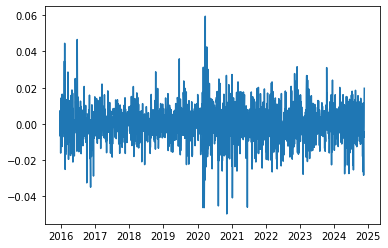

In [246]:
plt.plot(returns['GC=F'])

<AxesSubplot:>

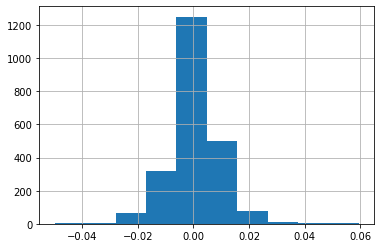

In [256]:
returns['GC=F'].hist()

In [259]:
npa=returns.values[1:].reshape(-1,1)

In [260]:
npa.shape

(2239, 1)

In [264]:
scale=MinMaxScaler(feature_range=(0,1))
npa=scale.fit_transform(npa)
print(len(npa))

2239


In [281]:
samples=10
steps=1

X=[]
Y=[]
for i in range(npa.shape[0]-samples):
    X.append(npa[i:i+samples])
    Y.append(npa[i+samples])

X=np.array(X)
Y=np.array(Y)


print('Sample training length is', len(X[0:1][0]))
print('Sample test length is', len(Y[0:1]))

Sample training length is 10
Sample test length is 1


In [282]:
print(X.shape,Y.shape)

(2229, 10, 1) (2229, 1)


In [286]:
X.shape[0]

2229

In [292]:
threshold=round(0.9*X.shape[0])
threshold


2006

In [293]:
model=keras.Sequential()
model.add(layers.SimpleRNN(3,activation='tanh',use_bias=True,input_shape=(X.shape[1],X.shape[2]))) 
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 15        
                                                                 
 dropout (Dropout)           (None, 3)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(X[:threshold],Y[:threshold],shuffle=False,epochs=10,batch_size=32,validation_split=0.2,verbose=1) 

Epoch 1/10
51/51 [==============================] - 1s 8ms/step - loss: 0.0665 - val_loss: 0.0130
Epoch 2/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0470 - val_loss: 0.0138
Epoch 3/10
51/51 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0137
Epoch 4/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0345 - val_loss: 0.0131
Epoch 5/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.0124
Epoch 6/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0119
Epoch 7/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.0111
Epoch 8/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.0107
Epoch 9/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0202 - val_loss: 0.0100
Epoch 10/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0097


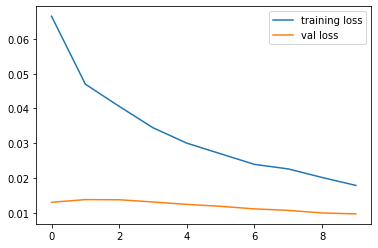

In [295]:
plt.plot(history.history["loss"],label='training loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()

In [309]:
pct_c_gold.shape[0]

2240

In [312]:
samples=10
steps=1
X=[]
y=[]
for i in range(pct_c_gold.shape[0]-samples):
    X.append(pct_c_gold.iloc[i:i+samples,0:5].values)
    y.append(pct_c_gold.iloc[i+samples,5:])

print('train data length', len(X[0:1][0]))
print('test data length', len(Y[0:1]))


train data length 10
test data length 1


In [313]:
X=np.array(X)
Y=np.array(Y)
print(X.shape,Y.shape)

(2230, 10, 5) (2229, 1)


In [318]:
threshold=round(0.9*X.shape[0])

trainX,trainY=X[:threshold],Y[:threshold]
testX,testY=X[threshold:],Y[threshold:]

print(trainX.shape, trainY.shape,testX.shape)

(2007, 10, 5) (2007, 1) (223, 10, 5)


In [323]:
model=keras.Sequential()
model.add(layers.SimpleRNN(30,activation='tanh',use_bias=True,input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                1080      
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________


In [324]:
history=model.fit(trainX,trainY,shuffle=False,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
51/51 [==============================] - 1s 7ms/step - loss: 0.0841 - val_loss: 0.0069
Epoch 2/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.0070
Epoch 3/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.0069
Epoch 4/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.0068
Epoch 5/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0150 - val_loss: 0.0069
Epoch 6/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 0.0071
Epoch 7/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0067
Epoch 8/10
51/51 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.0067
Epoch 9/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0119 - val_loss: 0.0070
Epoch 10/10
51/51 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 0.0071


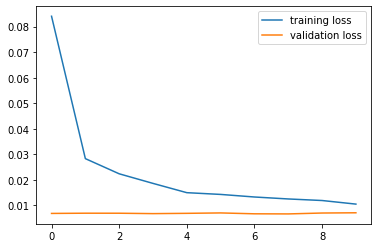

In [325]:
plt.plot(history.history["loss"],label='training loss')
plt.plot(history.history["val_loss"],label='validation loss')
plt.legend()
plt.show()


In [326]:
y_pred=model.predict(testX)

7/7 [==============================] - 0s 3ms/step


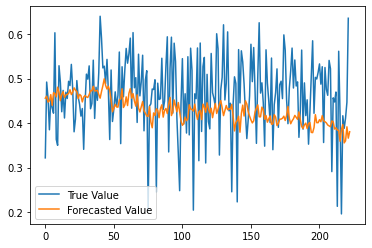

In [327]:
plt.plot(testY,label='True Value')
plt.plot(y_pred,label='Forecasted Value')
plt.legend()

In [328]:
trainX.shape

(2007, 10, 5)

In [329]:
trainY.shape

(2007, 1)

In [4]:
sequence_length=10

In [5]:
#train and valid with dropout regularized LSTM

from tensorflow import keras
from tensorflow.keras import layers


inputs=keras.Input(shape=(sequence_length,trainX.shape[-1]))
x=layers.LSTM(32,recurrent_dropout=0.25)(inputs)
x=layers.Dropout(0.5)(x)
outputs=layers.Dense(1)(x)
model=keras.Model(inputs,outputs)
callbacks=[keras.callbacks.ModelCheckpoint('jena_lstm_dropout.keras',save_best_only=True)]
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
history=model.fit(trainX,trainY,shuffle=False,epochs=10,validation_split=0.3,callbacks=callbacks,batch_size=128)

NameError: name 'trainX' is not defined

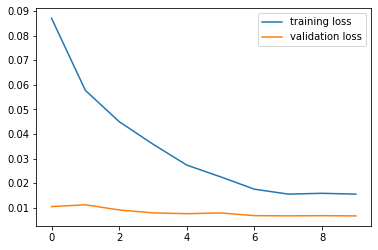

In [335]:
plt.plot(history.history["loss"],label='training loss')
plt.plot(history.history["val_loss"],label='validation loss')
plt.legend()
plt.show()


In [1]:
## using lstm with dropouts

inputs=keras.Input(shape=(sequence_length,raw_data.shape[-1]))
x=layers.LSTM(32,recurrent_dropout=0.25)(inputs)
x=layers.Dropout(0.5)(x)

outputs=layers.Dense(1)(x)

model=keras.Model(inputs,outputs)

callbacks=[keras.callbacks.ModelCheckpoint('jena_lstm_dropout.keras',save_best_only=True)]

model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])

history=model.fit(train_dataset,epochs=20,validation_data=valid_dataset,callbacks=callbacks)

NameError: name 'keras' is not defined

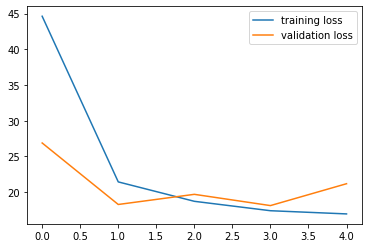

In [338]:
plt.plot(history.history["loss"],label='training loss')
plt.plot(history.history["val_loss"],label='validation loss')
plt.legend()
plt.show()


In [6]:
#lstm underperforms in reverse chronological order. its good at remembering recent past than distant past. For nlp, its worth exploiting a bidirectional setup

In [ ]:
inputs=keras.Input(shape=(sequence_length,raw_data.shape[-1]))
x=layers.Bidirectional(layers.LSTM(16))(inputs)
outputs=layers.Dense(1)(x)
model=keras.Model(inputs,outputs)

model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

history=model.fit(train_dataset,epochs=10,validation_data=valid_dataset)



In [ ]:
#bidirectional lstm does perform the same level as lstm 